<a href="https://colab.research.google.com/github/dharshini-248/Prediction-of-crop-production-using-time-series/blob/main/Crop_production_prediction_and_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """
/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


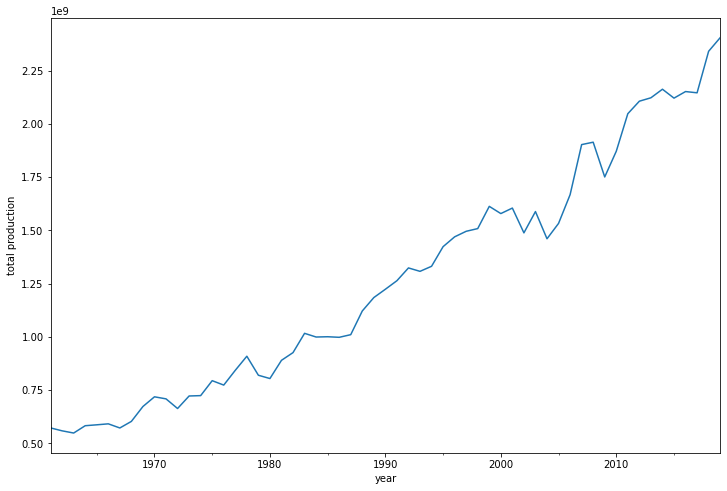

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from pandas import datetime
from statsmodels.tsa.stattools import adfuller
#import adfuller for stationery testing
dataset=pd.read_excel("total_production.xlsx",parse_dates=True)#To read the date column correctly, we can use the argument parse_dates to specify a list of date columns.
dataset['year']=pd.to_datetime(dataset['year'],infer_datetime_format=True)
# If True and no format is given, attempt to infer the format of the datetime strings, and if it can be inferred, switch to a faster method of parsing them. 
indexedDataset=dataset.set_index(['year'])
from datetime import datetime
indexedDataset.head(5)
plt.xlabel("Date")
plt.ylabel("total production")
indexedDataset['production'].plot(figsize=(12,8))

,production
year,
1961-01-01,NaN
1962-01-01,NaN
1963-01-01,NaN
1964-01-01,NaN
1965-01-01,NaN
1966-01-01,NaN
1967-01-01,NaN
1968-01-01,NaN
1969-01-01,NaN


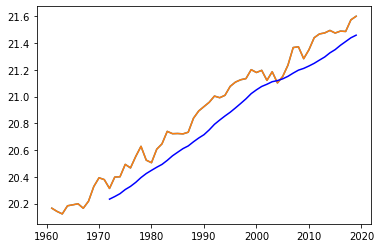

In [ ]:
#estimating trend
indexedDataset_logscale=np.log(indexedDataset)
plt.plot(indexedDataset_logscale)
movingaverage=indexedDataset_logscale.rolling(window=12).mean()
movingstd=indexedDataset_logscale.rolling(window=12).std()
plt.plot(indexedDataset_logscale)
plt.plot(movingaverage,color='blue')
datasetlogscaleminusmovingaverage=indexedDataset_logscale-movingaverage
datasetlogscaleminusmovingaverage.head(12)

In [ ]:
#remove Nan values 
datasetlogscaleminusmovingaverage.dropna(inplace=True)
datasetlogscaleminusmovingaverage.head(10)


,production
year,
1972-01-01,0.080084
1973-01-01,0.145667
1974-01-01,0.126429
1975-01-01,0.188058
1976-01-01,0.138072
1977-01-01,0.193900
1978-01-01,0.233520
1979-01-01,0.100154
1980-01-01,0.057118


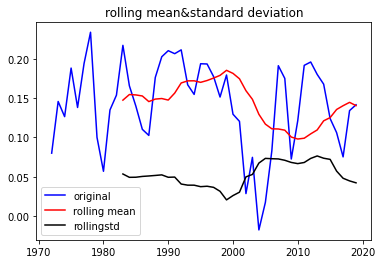

In [ ]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(indexedDataset_logscale):  
  #determining rolling statistics
  movingaverage=indexedDataset_logscale.rolling(window=12).mean()
  movingstd=indexedDataset_logscale.rolling(window=12).std()
  #plot rolling ststistics:
  orig=plt.plot(indexedDataset_logscale['production'],color='blue',label='original')
  mean=plt.plot(movingaverage,color='red',label='rolling mean')
  std=plt.plot(movingstd,color='black',label='rollingstd')
  plt.legend(loc='best')
  plt.title('rolling mean&standard deviation')
  plt.show(block=False)
test_stationarity(datasetlogscaleminusmovingaverage)

In [ ]:
#after stationery
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(datasetlogscaleminusmovingaverage.production.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('3.num of lags',result[2])
print('4.num of observations',result[3])
print('5.critical values')
for key,value in result[4].items():
  print(key,value)

ADF Statistic: -3.632119
p-value: 0.005176
3.num of lags 0
4.num of observations 47
5.critical values
1% -3.5778480370438146
5% -2.925338105429433
10% -2.6007735310095064


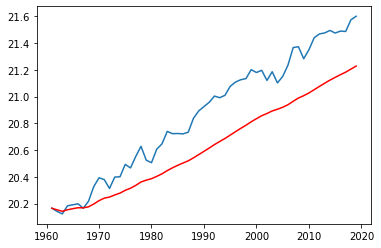

In [ ]:

exponential_decayweighted_average=indexedDataset_logscale.ewm(halflife=12,min_periods=0,adjust=True).mean()
plt.plot(indexedDataset_logscale)
plt.plot(exponential_decayweighted_average,color='red')


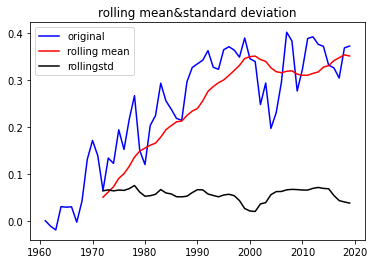

In [ ]:
datasetlogscaleminusmovingexponential_decayweighted_average=indexedDataset_logscale-exponential_decayweighted_average
test_stationarity(datasetlogscaleminusmovingexponential_decayweighted_average)

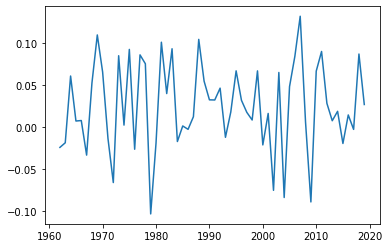

In [ ]:
datasetlogdiffshifting=indexedDataset_logscale-indexedDataset_logscale.shift()
plt.plot(datasetlogdiffshifting)

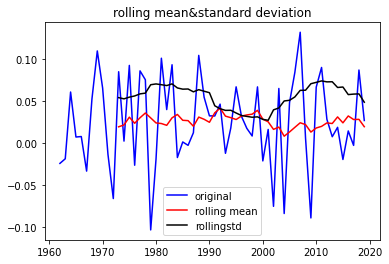

In [ ]:
datasetlogdiffshifting.dropna(inplace=True)
test_stationarity(datasetlogdiffshifting)

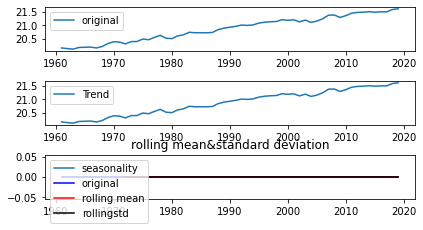

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition=seasonal_decompose(indexedDataset_logscale)
trend=decomposition.trend
seasonal=decomposition.seasonal
residual=decomposition.resid
plt.subplot(411)
plt.plot(indexedDataset_logscale,label='original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend,label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='seasonality')
plt.legend(loc='best')
plt.tight_layout()
decomposedlogdata=residual
decomposedlogdata.dropna(inplace=True)
test_stationarity(decomposedlogdata)

In [ ]:
#ACF and PACF plots
from statsmodels.tsa.stattools import acf,pacf
lag_acf=acf(datasetlogdiffshifting,nlags=20)
lag_pacf=pacf(datasetlogdiffshifting,nlags=20)


Text(0.5, 1.0, 'autocorrelation function')

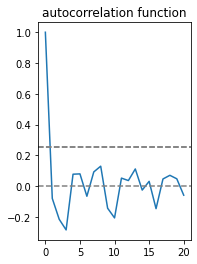

In [ ]:
#acf plot
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetlogdiffshifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetlogdiffshifting)),linestyle='--',color='gray')
plt.title('autocorrelation function')

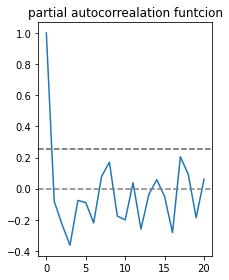

In [ ]:
#plot pacf
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle="--",color="gray")
plt.axhline(y=1.96/np.sqrt(len(datasetlogdiffshifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetlogdiffshifting)),linestyle='--',color='gray')
plt.title('partial autocorrealation funtcion')
plt.tight_layout()

plotting AR model


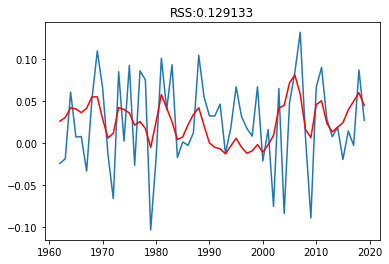

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
#AR model
model=ARIMA(indexedDataset_logscale,order=(2,1,2))
result_AR=model.fit(disp=-1)
plt.plot(datasetlogdiffshifting)
plt.plot(result_AR.fittedvalues,color='red')
plt.title('RSS:%4f'%sum((result_AR.fittedvalues-datasetlogdiffshifting["production"])**2))
print("plotting AR model")

plotting MA model


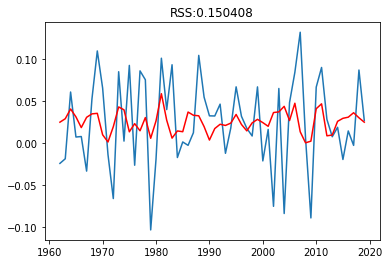

In [ ]:
#MA model
model=ARIMA(indexedDataset_logscale,order=(2,1,0))
results_MA=model.fit(disp=-1)
plt.plot(datasetlogdiffshifting)
plt.plot(results_MA.fittedvalues,color='red')
plt.title('RSS:%4f'%sum((results_MA.fittedvalues-datasetlogdiffshifting['production'])**2))
print('plotting MA model')

year
1962-01-01    0.026021
1963-01-01    0.030470
1964-01-01    0.042035
1965-01-01    0.040698
1966-01-01    0.036308
1967-01-01    0.041499
1968-01-01    0.054970
1969-01-01    0.055061
1970-01-01    0.028552
1971-01-01    0.006076
1972-01-01    0.011697
1973-01-01    0.042331
1974-01-01    0.039907
1975-01-01    0.035959
1976-01-01    0.021375
1977-01-01    0.025591
1978-01-01    0.017399
1979-01-01   -0.005174
1980-01-01    0.025107
1981-01-01    0.057792
1982-01-01    0.041616
1983-01-01    0.025375
1984-01-01    0.004182
1985-01-01    0.007259
1986-01-01    0.021947
1987-01-01    0.034114
1988-01-01    0.042159
1989-01-01    0.020563
1990-01-01    0.000241
1991-01-01   -0.005000
1992-01-01   -0.006809
1993-01-01   -0.012837
1994-01-01   -0.003389
1995-01-01    0.005754
1996-01-01   -0.004883
1997-01-01   -0.012114
1998-01-01   -0.009344
1999-01-01   -0.001818
2000-01-01   -0.010867
2001-01-01   -0.001936
2002-01-01    0.009056
2003-01-01    0.041706
2004-01-01    0.044923
2005-0

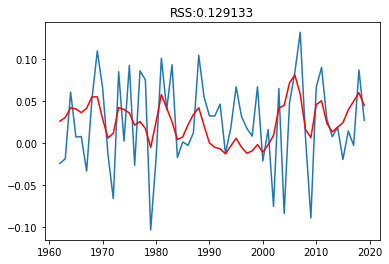

In [ ]:
model=ARIMA(indexedDataset_logscale,order=(2,1,2))
results_ARIMA=model.fit(disp=-1)
plt.plot(datasetlogdiffshifting)
plt.plot(results_ARIMA.fittedvalues,color='red')
plt.title('RSS:%4f'%sum((results_ARIMA.fittedvalues-datasetlogdiffshifting['production'])**2))
predictions_ARIMA_diff=pd.Series(results_ARIMA.fittedvalues,copy=True)
print(predictions_ARIMA_diff)

In [ ]:
#convert to cumulative sum:
predictions_ARIMA_diff_cumsum=predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum)

year
1962-01-01    0.026021
1963-01-01    0.056491
1964-01-01    0.098526
1965-01-01    0.139224
1966-01-01    0.175532
1967-01-01    0.217031
1968-01-01    0.272001
1969-01-01    0.327062
1970-01-01    0.355614
1971-01-01    0.361690
1972-01-01    0.373387
1973-01-01    0.415718
1974-01-01    0.455625
1975-01-01    0.491584
1976-01-01    0.512958
1977-01-01    0.538549
1978-01-01    0.555948
1979-01-01    0.550775
1980-01-01    0.575882
1981-01-01    0.633674
1982-01-01    0.675290
1983-01-01    0.700665
1984-01-01    0.704848
1985-01-01    0.712106
1986-01-01    0.734053
1987-01-01    0.768167
1988-01-01    0.810327
1989-01-01    0.830890
1990-01-01    0.831131
1991-01-01    0.826130
1992-01-01    0.819321
1993-01-01    0.806483
1994-01-01    0.803095
1995-01-01    0.808848
1996-01-01    0.803966
1997-01-01    0.791852
1998-01-01    0.782508
1999-01-01    0.780690
2000-01-01    0.769823
2001-01-01    0.767886
2002-01-01    0.776943
2003-01-01    0.818649
2004-01-01    0.863572
2005-0

In [ ]:
predictions_ARIMA_log=pd.Series(indexedDataset_logscale['production'],index=indexedDataset_logscale.index)
predictions_ARIMA_log=predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

year
1961-01-01    20.165381
1962-01-01    20.167219
1963-01-01    20.178992
1964-01-01    20.281838
1965-01-01    20.329762
dtype: float64

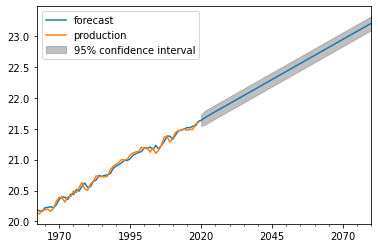

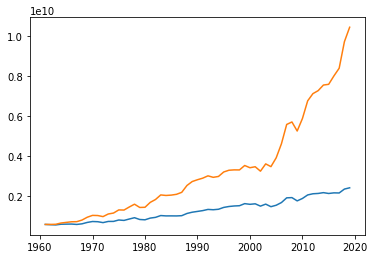

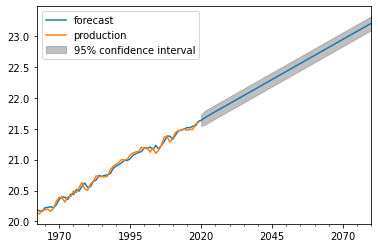

In [ ]:
predictions_ARIMA=np.exp(predictions_ARIMA_log)
plt.plot(indexedDataset)
plt.plot(predictions_ARIMA)
indexedDataset_logscale
results_ARIMA.plot_predict(1,119)

In [ ]:
x=results_ARIMA.forecast(steps=120)
x[1]

array([0.04600207, 0.05542846, 0.05710678, 0.05729514, 0.05730586,
       0.05730591, 0.057306  , 0.05730604, 0.05730605, 0.05730605,
       0.05730605, 0.05730605, 0.05730605, 0.05730605, 0.05730605,
       0.05730605, 0.05730606, 0.05730606, 0.05730606, 0.05730606,
       0.05730606, 0.05730606, 0.05730606, 0.05730606, 0.05730606,
       0.05730606, 0.05730606, 0.05730606, 0.05730606, 0.05730606,
       0.05730606, 0.05730606, 0.05730607, 0.05730607, 0.05730607,
       0.05730607, 0.05730607, 0.05730607, 0.05730607, 0.05730607,
       0.05730607, 0.05730607, 0.05730607, 0.05730607, 0.05730607,
       0.05730607, 0.05730607, 0.05730607, 0.05730608, 0.05730608,
       0.05730608, 0.05730608, 0.05730608, 0.05730608, 0.05730608,
       0.05730608, 0.05730608, 0.05730608, 0.05730608, 0.05730608,
       0.05730608, 0.05730608, 0.05730608, 0.05730609, 0.05730609,
       0.05730609, 0.05730609, 0.05730609, 0.05730609, 0.05730609,
       0.05730609, 0.05730609, 0.05730609, 0.05730609, 0.05730

In [ ]:
len(x[1])

120

In [ ]:
np.exp(x[1])

array([1.04707658, 1.0569934 , 1.05876886, 1.05896831, 1.05897966,
       1.05897971, 1.05897981, 1.05897986, 1.05897986, 1.05897986,
       1.05897986, 1.05897986, 1.05897986, 1.05897987, 1.05897987,
       1.05897987, 1.05897987, 1.05897987, 1.05897987, 1.05897987,
       1.05897987, 1.05897987, 1.05897987, 1.05897987, 1.05897987,
       1.05897987, 1.05897987, 1.05897987, 1.05897988, 1.05897988,
       1.05897988, 1.05897988, 1.05897988, 1.05897988, 1.05897988,
       1.05897988, 1.05897988, 1.05897988, 1.05897988, 1.05897988,
       1.05897988, 1.05897988, 1.05897988, 1.05897989, 1.05897989,
       1.05897989, 1.05897989, 1.05897989, 1.05897989, 1.05897989,
       1.05897989, 1.05897989, 1.05897989, 1.05897989, 1.05897989,
       1.05897989, 1.05897989, 1.05897989, 1.0589799 , 1.0589799 ,
       1.0589799 , 1.0589799 , 1.0589799 , 1.0589799 , 1.0589799 ,
       1.0589799 , 1.0589799 , 1.0589799 , 1.0589799 , 1.0589799 ,
       1.0589799 , 1.0589799 , 1.0589799 , 1.05897991, 1.05897

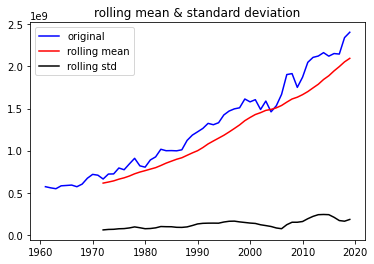

In [ ]:
#plot rolling statistics
orig=plt.plot(indexedDataset,color='blue',label='original')
mean=plt.plot(rolmean,color='red',label='rolling mean')
std=plt.plot(rolstd,color='black',label='rolling std')
plt.legend(loc='best')
plt.title('rolling mean & standard deviation')
plt.show(block=False)

In [ ]:
dataset.shape

(59, 2)

In [ ]:
#determining rolling statistics
rolmean=indexedDataset.rolling(window=25).mean()
rolstd=indexedDataset.rolling(window=25).std()
print(rolmean,rolstd)

              production
year                    
1961-01-01           NaN
1962-01-01           NaN
1963-01-01           NaN
1964-01-01           NaN
1965-01-01           NaN
1966-01-01           NaN
1967-01-01           NaN
1968-01-01           NaN
1969-01-01           NaN
1970-01-01           NaN
1971-01-01           NaN
1972-01-01           NaN
1973-01-01           NaN
1974-01-01           NaN
1975-01-01           NaN
1976-01-01           NaN
1977-01-01           NaN
1978-01-01           NaN
1979-01-01           NaN
1980-01-01           NaN
1981-01-01           NaN
1982-01-01           NaN
1983-01-01           NaN
1984-01-01           NaN
1985-01-01  7.441089e+08
1986-01-01  7.611289e+08
1987-01-01  7.791920e+08
1988-01-01  8.021176e+08
1989-01-01  8.261890e+08
1990-01-01  8.516538e+08
1991-01-01  8.785402e+08
1992-01-01  9.086026e+08
1993-01-01  9.367893e+08
1994-01-01  9.631283e+08
1995-01-01  9.913344e+08
1996-01-01  1.021772e+09
1997-01-01  1.055063e+09
1998-01-01  1.086508e+09


In [ ]:
#perform ADCF test
from statsmodels.tsa.stattools import adfuller

def ad_test(indexedDataset):
  dftest=adfuller(indexedDataset,autolag='AIC')
  print('1.ADF test',dftest[0])
  print('2.p-value',dftest[1])
  print('3.num of lags',dftest[2])
  print('4.num of observations',dftest[3])
  print('5.critical values')
  for key,value in dftest[4].items():
    print(key,value)

In [ ]:
ad_test(indexedDataset['production'])

1.ADF test 1.7689371921980181
2.p-value 0.9982853776733573
3.num of lags 3
4.num of observations 55
5.critical values
1% -3.5552728880540942
5% -2.9157312396694217
10% -2.5956695041322315


In [ ]:
indexedDataset_diff=indexedDataset.diff(periods=1)
indexedDataset_diff=indexedDataset_diff[1:]
indexedDataset_diff.head()


,production
year,
1962-01-01,-13676969.0
1963-01-01,-10349366.0
1964-01-01,34382408.0
1965-01-01,4227155.0
1966-01-01,4593538.0


In [ ]:
#after stationery
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(indexedDataset_diff.production.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('3.num of lags',result[2])
print('4.num of observations',result[3])
print('5.critical values')
for key,value in result[4].items():
  print(key,value)

ADF Statistic: -6.490894
p-value: 0.000000
3.num of lags 2
4.num of observations 55
5.critical values
1% -3.5552728880540942
5% -2.9157312396694217
10% -2.5956695041322315


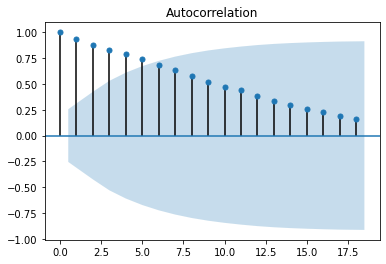

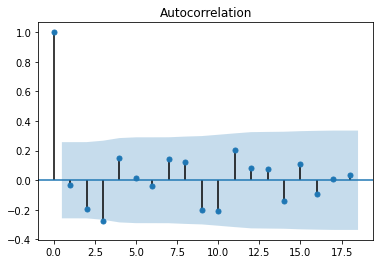

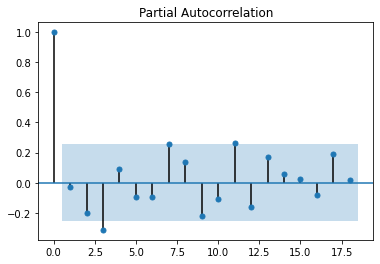

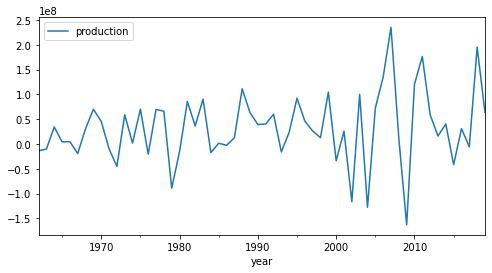

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(indexedDataset)
plot_acf(indexedDataset_diff)
plot_pacf(indexedDataset_diff)
indexedDataset_diff.plot(figsize=(8,4))


In [ ]:
x=indexedDataset.values
x.size

59

In [ ]:
train=x[:35]
test=x[35:]

In [ ]:
print(test)
test.size

[[1469772834]
 [1495805780]
 [1508475843]
 [1612877683]
 [1579003389]
 [1604836351]
 [1488413269]
 [1588434286]
 [1460646409]
 [1532767730]
 [1667629210]
 [1902923775]
 [1914185274]
 [1750944767]
 [1871629928]
 [2047982601]
 [2106737826]
 [2122737303]
 [2162955472]
 [2121143814]
 [2152004666]
 [2146108960]
 [2341187160]
 [2404987476]]


24

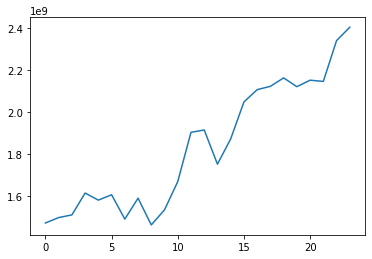

In [ ]:
predictions=[]
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error

model_ar=AR(train)
model_ar_fit=model_ar.fit()
prediction=model_ar_fit.predict(start=35,end=59)
plt.plot(test)

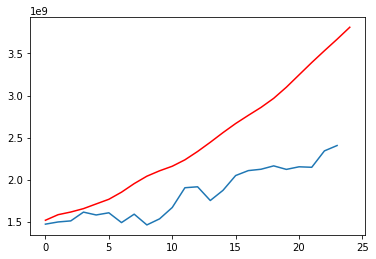

In [ ]:
plt.plot(test)

plt.plot(prediction,color='red')

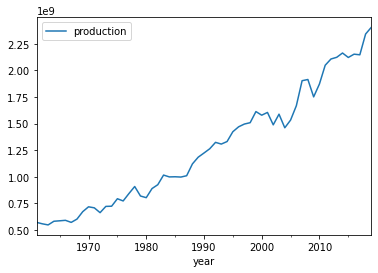

In [ ]:
indexedDataset.plot()

In [ ]:
##arima model
from statsmodels.tsa.arima_model import ARIMA
model_arima=ARIMA(train,order=(0,2,1))
model_arima_fit=model_arima.fit(disp=-1)
print(model_arima_fit.aic)


1267.281081884253


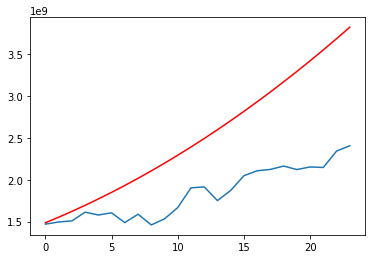

In [ ]:
predictions=model_arima_fit.forecast(steps=24)[0]
predictions
plt.plot(test)
plt.plot(predictions,color='red')

In [ ]:
indexedDataset.shape
#119




(59, 1)

In [ ]:
from math import sqrt
rmse=sqrt(mean_squared_error(test,predictions))
rmse

805982558.1474367

In [ ]:
import itertools
p=d=q=range(0,5)
pdq=list(itertools.product(p,d,q))
pdq


[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (1, 3, 4),
 (1, 4, 0),
 (1, 4, 1),
 (1, 4, 2),
 (1, 4, 3),
 (1, 4, 4),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2),
 (2, 2, 3),
 (2, 2, 4),
 (2, 3, 0),
 (2, 3, 1),
 (2, 3, 2),
 (2, 3, 3),
 (2, 3, 4),
 (2, 4, 0),
 (2, 4, 1),
 (2, 4, 2),
 (2, 4, 3),
 (2, 4, 4),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3,

In [ ]:
import warnings
warnings.filterwarnings('ignore')
for param in pdq:
  try:
    model_arima=model_arima=ARIMA(train,order=param)
    model_arima_fit=model_arima.fit()
    print(param,model_arima_fit.aic)
  except:
     continue

(0, 0, 0) 1459.232101450697
(0, 0, 1) 1423.1799513671135
(0, 0, 2) 1403.4757716408149
(0, 0, 3) 1384.1775041891233
(0, 1, 0) 1297.6395776256002
(0, 1, 1) 1299.6004036035092
(0, 1, 2) 1298.9130444855798
(0, 1, 3) 1300.912977000599
(0, 1, 4) 1302.9129747415893
(0, 2, 0) 1282.625568598944
(0, 2, 1) 1267.281081884253
(0, 2, 2) 1269.265605463612
(1, 0, 0) 1351.53459315267
(1, 1, 0) 1299.620361426615
(1, 2, 0) 1279.392664795267
(1, 2, 3) 1265.8467111520936
(2, 0, 0) 1351.8372363806272
(2, 1, 0) 1299.6141633517263
(2, 1, 1) 1300.648343418171
(2, 2, 0) 1277.1811942760594
(2, 2, 3) 1263.0830452592973
(3, 0, 0) 1353.8269793966883
(3, 1, 0) 1300.9185403074541
(3, 1, 1) 1302.5195069585325
(3, 1, 2) 1304.477660022215
(3, 2, 0) 1276.8497447329137
(3, 2, 3) 1267.5633461284276
(4, 0, 0) 1355.1616551240013
(4, 1, 0) 1301.8985684743363
(4, 1, 1) 1303.58701503304
(4, 1, 2) 1305.5862316017137
(4, 1, 3) 1302.068457433259
(4, 2, 0) 1273.5680864858425
(4, 2, 1) 1270.0813770274658
(4, 2, 2) 1264.368929034157


Text(0.5, 1.0, 'area harvested')

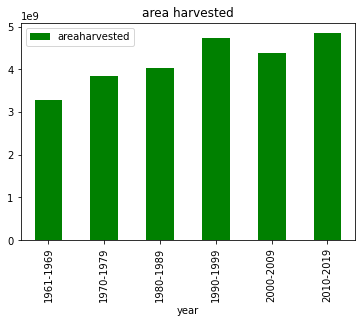

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pylab
df=pd.read_excel("datavis1.csv.xlsx")
df.plot(kind="bar",x='year',y='areaharvested',color="green")
plt.title("area harvested")

Text(0.5, 1.0, 'yield')

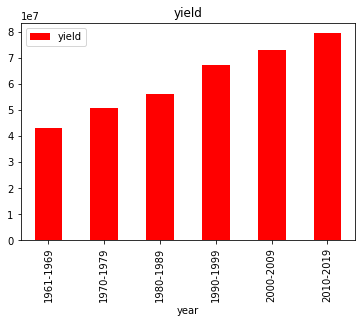

In [ ]:
df.plot(kind="bar",x='year',y='yield',color="red")
plt.title("yield")

Text(0.5, 1.0, 'production')

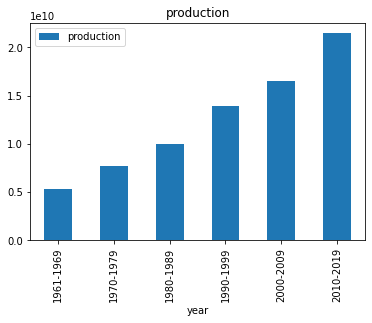

In [ ]:
df.plot(kind="bar",x='year',y='production')
plt.title("production")

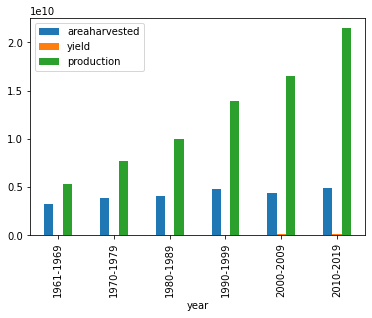

In [ ]:
df.plot(x="year", y=['areaharvested','yield','production'], kind="bar")
plt.show()


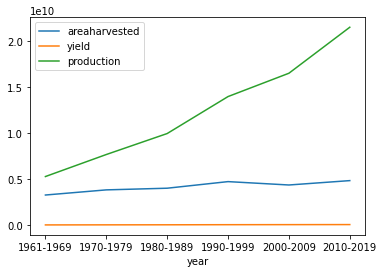

In [ ]:
df.plot(x="year", y=['areaharvested','yield','production'], kind="line")

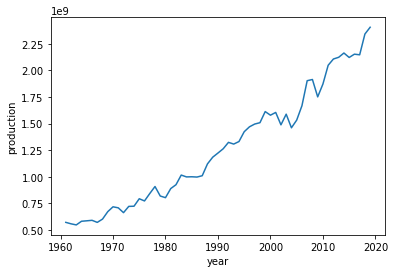

In [ ]:
#plot graph
plt.xlabel("year")
plt.ylabel("production")
plt.plot(indexedDataset)